# IMDB Movie reviews positivity classification

In this notebook, we are going to experiment with a build-in Keras' IMDB dataset. As a name suggests, it contains movie reviews that are manually tagged as positive or negative.

Goal of this notebook is to experiment and build intuition when working with data and a neural network.

In [1]:
from tensorflow.keras.datasets import imdb

First of all, let's import the data. As we can see, there are 25000 training and another 25000 test items. By setting up `num_words` to 10000, we are limiting our features dimensionality.

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print('Training data shape: {}\nTraining labels shape: {}\n'.format(train_data.shape, train_labels.shape))
print('Test data shape: {}'.format(test_data.shape))

print('Max: {} Min: {} word index in data'.format(max([max(sequence) for sequence in train_data]), min([min(sequence) for sequence in train_data])))

Training data shape: (25000,)
Training labels shape: (25000,)

Test data shape: (25000,)
Max: 9999 Min: 1 word index in data


Here is a preview of what limited dimensionality did to our sentences and how to reconstruct it back from the numbers.

In [3]:
def preview_decoded_review(i):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])
    return decoded_review
preview_decoded_review(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np

Very simple preprocessing into the bag of words like matrix.

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

We'll split our data into 3 groups. Training, validation and testing.

In [7]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

Finally we are able to build our model. We are using 3 layers of fully-connected dense layers with 16 nodes and relu activation function for the first two layers. Last layer has only 1 node with sigmoid activation function, which represents binary classification output with a probability output.
Since we are doing binary classification, we chose a binary crossentropy as our loss function.

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.5139 - acc: 0.7983 - val_loss: 0.3963 - val_acc: 0.8661
Epoch 2/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.3123 - acc: 0.8991 - val_loss: 0.3089 - val_acc: 0.8872
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2278 - acc: 0.9261 - val_loss: 0.2792 - val_acc: 0.8913
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1810 - acc: 0.9408 - val_loss: 0.2718 - val_acc: 0.8913
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1462 - acc: 0.9527 - val_loss: 0.2755 - val_acc: 0.8895
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1228 - acc: 0.9619 - val_loss: 0.2915 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1005 - acc: 0.9713 - val_loss: 0.3063 - val_

In [11]:
import matplotlib.pyplot as plt

As we can see, by training with 20 epochs, we are clearly overfitting our model. Around 3 epochs, are model is performing at it's maximum. Then, loss on validation data gets bigger and bigger.

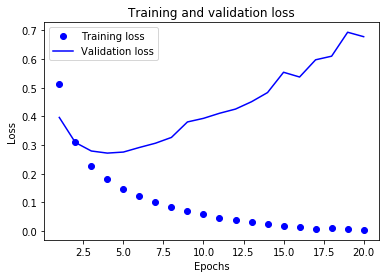

In [12]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

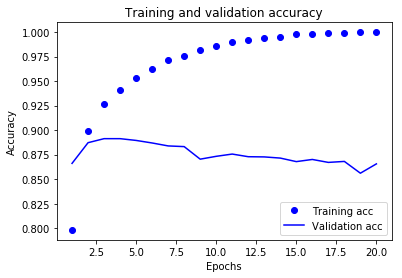

In [13]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [14]:
model.predict(X_test)

array([[7.8837080e-03],
       [1.0000000e+00],
       [9.9461454e-01],
       ...,
       [8.7798346e-04],
       [7.8724967e-03],
       [6.2826586e-01]], dtype=float32)

To experiment with a network setup:
* Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
* Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
* Try using the mse loss function instead of binary_crossentropy.
* Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.